In [1]:
import pandas as pd
import numpy as np

def load_data():
    data = pd.read_csv('./comments_apple.csv')
    return data

data = load_data()
data.head(4)

,comments
0,okay dont wanna say come fan
1,idea appl connect appl quotjust worksquot accu...
2,joke exclusionari practic theyr antitrust suit
3,much batteri suck get


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  1143 non-null   object
dtypes: object(1)
memory usage: 9.5+ KB


In [3]:
df = pd.DataFrame(data['comments'])
df.head(5)

,comments
0,okay dont wanna say come fan
1,idea appl connect appl quotjust worksquot accu...
2,joke exclusionari practic theyr antitrust suit
3,much batteri suck get
4,play bgmi


In [4]:
!pip install textblob

In [5]:
from textblob import TextBlob
import numpy as np

sentiments = []

for text in df['comments']:
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiments.append('positive')
        elif polarity < 0:
            sentiments.append('negative')
        else:
            sentiments.append('neutral')
    else:
        sentiments.append(np.nan)

df['sentiment'] = sentiments

data = df[['comments', 'sentiment']]
data.head(5)

,comments,sentiment
0,okay dont wanna say come fan,positive
1,idea appl connect appl quotjust worksquot accu...,positive
2,joke exclusionari practic theyr antitrust suit,neutral
3,much batteri suck get,positive
4,play bgmi,neutral


C:\Users\amara\AppData\Local\Temp\ipykernel_9740\1842430282.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


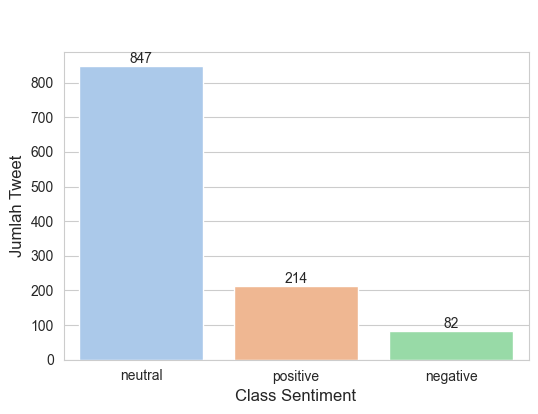

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title(' ', fontsize=14, pad=20)
plt.xlabel('Class Sentiment',fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [7]:
data.to_csv('Hasil_Labeling_apple.csv',encoding='utf8', index=False)